In [1]:
import numpy as np
import igraph
from itertools import combinations

import matplotlib.pyplot as plt

from pulser import Pulse, Sequence, Register
from pulser.waveforms import RampWaveform
from pulser_simulation import Simulation
from pulser.devices import Chadoq2

In [2]:
def pos_to_graph ( pos ) :
    rb = Chadoq2.rydberg_blockade_radius ( 1.0 )
    g = igraph.Graph ()
    N = len ( pos )
    edges = [
        [ m , n ]
        for m , n in combinations ( range ( N ) , r = 2 )
        if np.linalg.norm ( pos [ m ] - pos [ n ] ) < rb
    ]
    g.add_vertices ( N )
    g.add_edges ( edges )
    return g

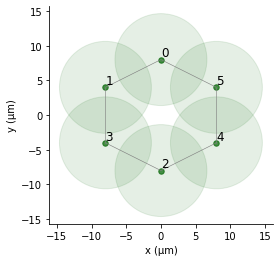

In [3]:
pos = np.array ( [ [ 0 , 8 ] , [ -8 , 4 ] , [ 0 , -8 ] , [ -8 , -4 ] , [ 8 , -4 ] , [ 8 , 4 ] ] )

G = pos_to_graph ( pos )
qubits = dict ( enumerate ( pos ) )

reg = Register ( qubits )
reg.draw (
    blockade_radius = Chadoq2.rydberg_blockade_radius ( 1.0 ) ,
    draw_graph = True ,
    draw_half_radius = True ,
)

In [4]:
# Parameters in rad/µs and ns
Omega_max = 2.3 * 2 * np.pi
U = Omega_max / 2.3

delta_0 = -6 * U
delta_f = 2 * U

t_rise = 252
t_fall = 500
t_sweep = ( delta_f - delta_0 ) / ( 2 * np.pi * 10 ) * 1000

In [5]:
rise = Pulse.ConstantDetuning (
    RampWaveform ( t_rise , 0.0 , Omega_max ) , delta_0 , 0.0
)
sweep = Pulse.ConstantAmplitude (
    Omega_max , RampWaveform ( t_sweep , delta_0 , delta_f ) , 0.0
)
fall = Pulse.ConstantDetuning (
    RampWaveform ( t_fall , Omega_max , 0.0 ) , delta_f , 0.0
)

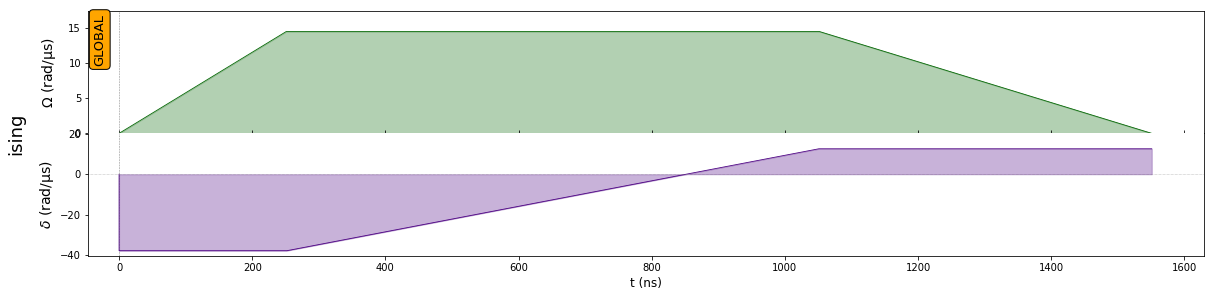

In [6]:
seq = Sequence ( reg , Chadoq2 )
seq.declare_channel ( "ising" , "rydberg_global" )

seq.add ( rise , "ising" )
seq.add ( sweep , "ising" )
seq.add ( fall , "ising" )

seq.draw()

In [7]:
simul = Simulation ( seq , sampling_rate = 0.02 )
results = simul.run ( progress_bar = True )

12.9%. Run time:   0.00s. Est. time left: 00:00:00:00
22.6%. Run time:   0.01s. Est. time left: 00:00:00:00
32.3%. Run time:   0.01s. Est. time left: 00:00:00:00
41.9%. Run time:   0.02s. Est. time left: 00:00:00:00
51.6%. Run time:   0.02s. Est. time left: 00:00:00:00
61.3%. Run time:   0.03s. Est. time left: 00:00:00:00
71.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.6%. Run time:   0.03s. Est. time left: 00:00:00:00
90.3%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s


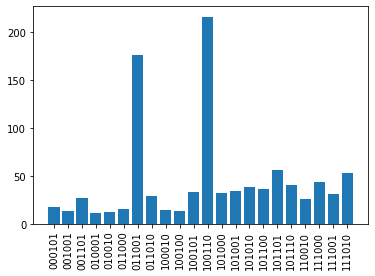

In [8]:
count = results.sample_final_state ()

most_freq = { k : v for k , v in count.items () if v > 10 }
plt.bar ( list ( most_freq.keys () ) , list ( most_freq.values () ) )
plt.xticks ( rotation = "vertical" )
plt.show ()

In [9]:
final = { k : v for k , v in count.items () if v > 150 }
result =  { 0 : 'Vincent buys Tess a gift and writes her a poem' ,
            1 : 'Vincent buys Uma a gift and writes her a poem' ,
            2 : 'Tess buys Vincent a gift and writes him a poem' ,
            3 : 'Tess buys Uma a gift and writes her a poem' ,
            4 : 'Uma buys Vincent a gift and writes him a poem' ,
            5 : 'Uma buys Tess a gift and writes her a poem' }
for k in final.keys () :
    print ( '=== solution ===' )
    for i in range ( 6 ) :
        if k [ i ] == '1' :
            print ( result [ i ] )

=== solution ===
Vincent buys Uma a gift and writes her a poem
Tess buys Vincent a gift and writes him a poem
Uma buys Tess a gift and writes her a poem
=== solution ===
Vincent buys Tess a gift and writes her a poem
Tess buys Uma a gift and writes her a poem
Uma buys Vincent a gift and writes him a poem
